In [ ]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt; import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/creditcard.csv')

================--------------=================
Current Shape:  (284807, 31)
 Duplicate counting:  1081
================--------------=================
 Duplicate counting after droping:  0


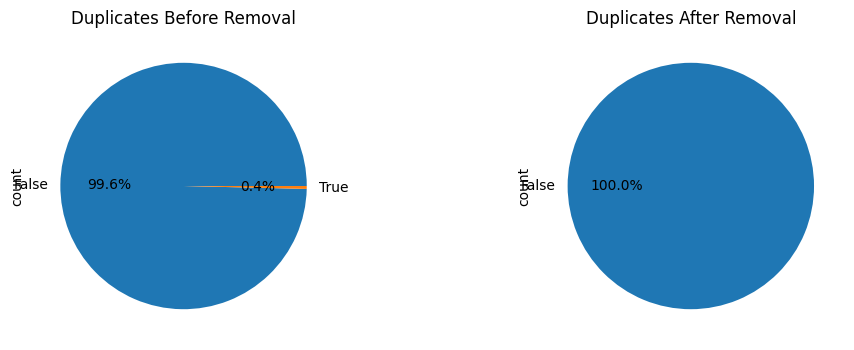

After remove duplocate the Shape:  (283726, 31)
================--------------=================


In [ ]:

print("================--------------=================")
print("Current Shape: ", df.shape)
print( " Duplicate counting: ", df.duplicated().sum())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# First pie chart (before removing duplicates)
df.duplicated().value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title('Duplicates Before Removal')

print("================--------------=================")
df.drop_duplicates(inplace=True)
print( " Duplicate counting after droping: ", df.duplicated().sum())

# Second pie chart (after removing duplicates)
df.duplicated().value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Duplicates After Removal')


plt.show()

print("After remove duplocate the Shape: ", df.shape)
print("================--------------=================")

# print(df.isnull().sum()) # NO NULL


Data in output colum:  Class
0    283253
1       473
Name: count, dtype: int64


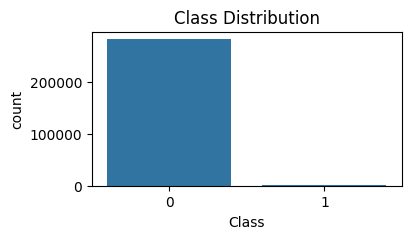

In [ ]:
print( "Data in output colum: " , df['Class'].value_counts())

plt.figure(figsize=(4, 2))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

Data in output column: Class
0    283253
1    283253
Name: count, dtype: int64
(566506, 31)


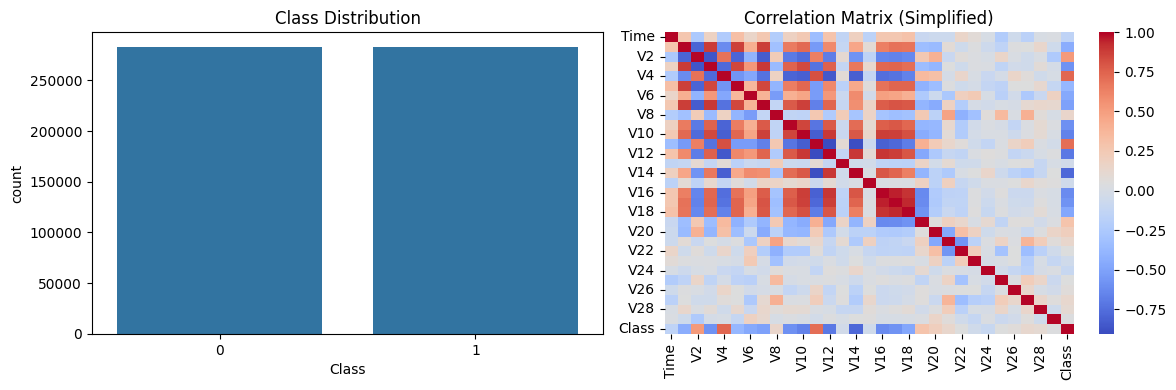

In [ ]:
from imblearn.over_sampling import SMOTE
X = df.drop('Class', axis=1)
y = df['Class']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_balanced_smote = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced_smote['Class'] = y_resampled

print("Data in output column:", df_balanced_smote['Class'].value_counts())
print(df_balanced_smote.shape)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Class', data=df_balanced_smote, ax=axes[0])
axes[0].set_title('Class Distribution')

corr_matrix = df_balanced_smote.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", ax=axes[1], cbar=True)
axes[1].set_title('Correlation Matrix (Simplified)')

plt.tight_layout()
plt.show()


In [ ]:
df = df_balanced_smote.copy()
df.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0


In [ ]:
df.tail(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
566502,14264.057012,-4.705909,8.250299,-14.559164,9.787990,-4.117161,-3.169121,-10.169571,4.500750,-5.177936,...,1.988732,0.194092,0.480124,-1.079562,-0.444215,0.557467,1.234855,0.627900,1.699263,1
566503,135064.971368,0.407366,1.352354,-4.892782,3.554728,-1.282114,-1.271505,-0.977517,0.462476,-1.442286,...,0.765180,0.703300,0.814076,0.814930,-0.300969,0.168339,0.236775,0.037244,282.964802,1
566504,109361.849259,0.580032,2.773047,-5.790024,5.606953,0.398480,-0.621865,-2.954884,0.837074,-1.822486,...,0.311488,-0.810361,-0.067584,-0.632356,0.414552,0.073243,0.736440,0.358067,4.145185,1
566505,84438.552579,-2.819178,2.410529,-5.833727,4.099991,-2.622497,-2.198030,-6.054611,1.857574,-3.791847,...,1.163557,-0.244352,0.134456,-0.292208,0.685146,0.740121,1.406461,0.319263,5.892535,1


In [ ]:
# Converting time from second to hour
df['Time'] = df['Time'].apply(lambda sec : (sec/3600))

In [ ]:
# Calculating hour of the day
import math
df['hour'] = df['Time']%24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x : math.floor(x))

In [ ]:
# Calculating First and Second day
df['day'] = df['Time']/24   # 2 days of data
df['day'] = df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))


In [ ]:
# df.tail(20)

In [ ]:
# remove outlire from Amount
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]
df.shape

(506739, 33)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))


<ipython-input-12-23cad4a64124>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))


In [ ]:
# drop Time colum
df.drop('Time', axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ( accuracy_score,
                             confusion_matrix,
                              classification_report,
                              roc_auc_score,
                              mean_squared_error,
                              mean_absolute_error,
                              r2_score,
                              roc_curve,
                              auc,
                              precision_score,
                              recall_score,
                              f1_score,
                              precision_recall_curve,

                              )


# Applying Random Forest Classifier for predict and also select top features

Text(0, 0.5, 'Correlation with Target')

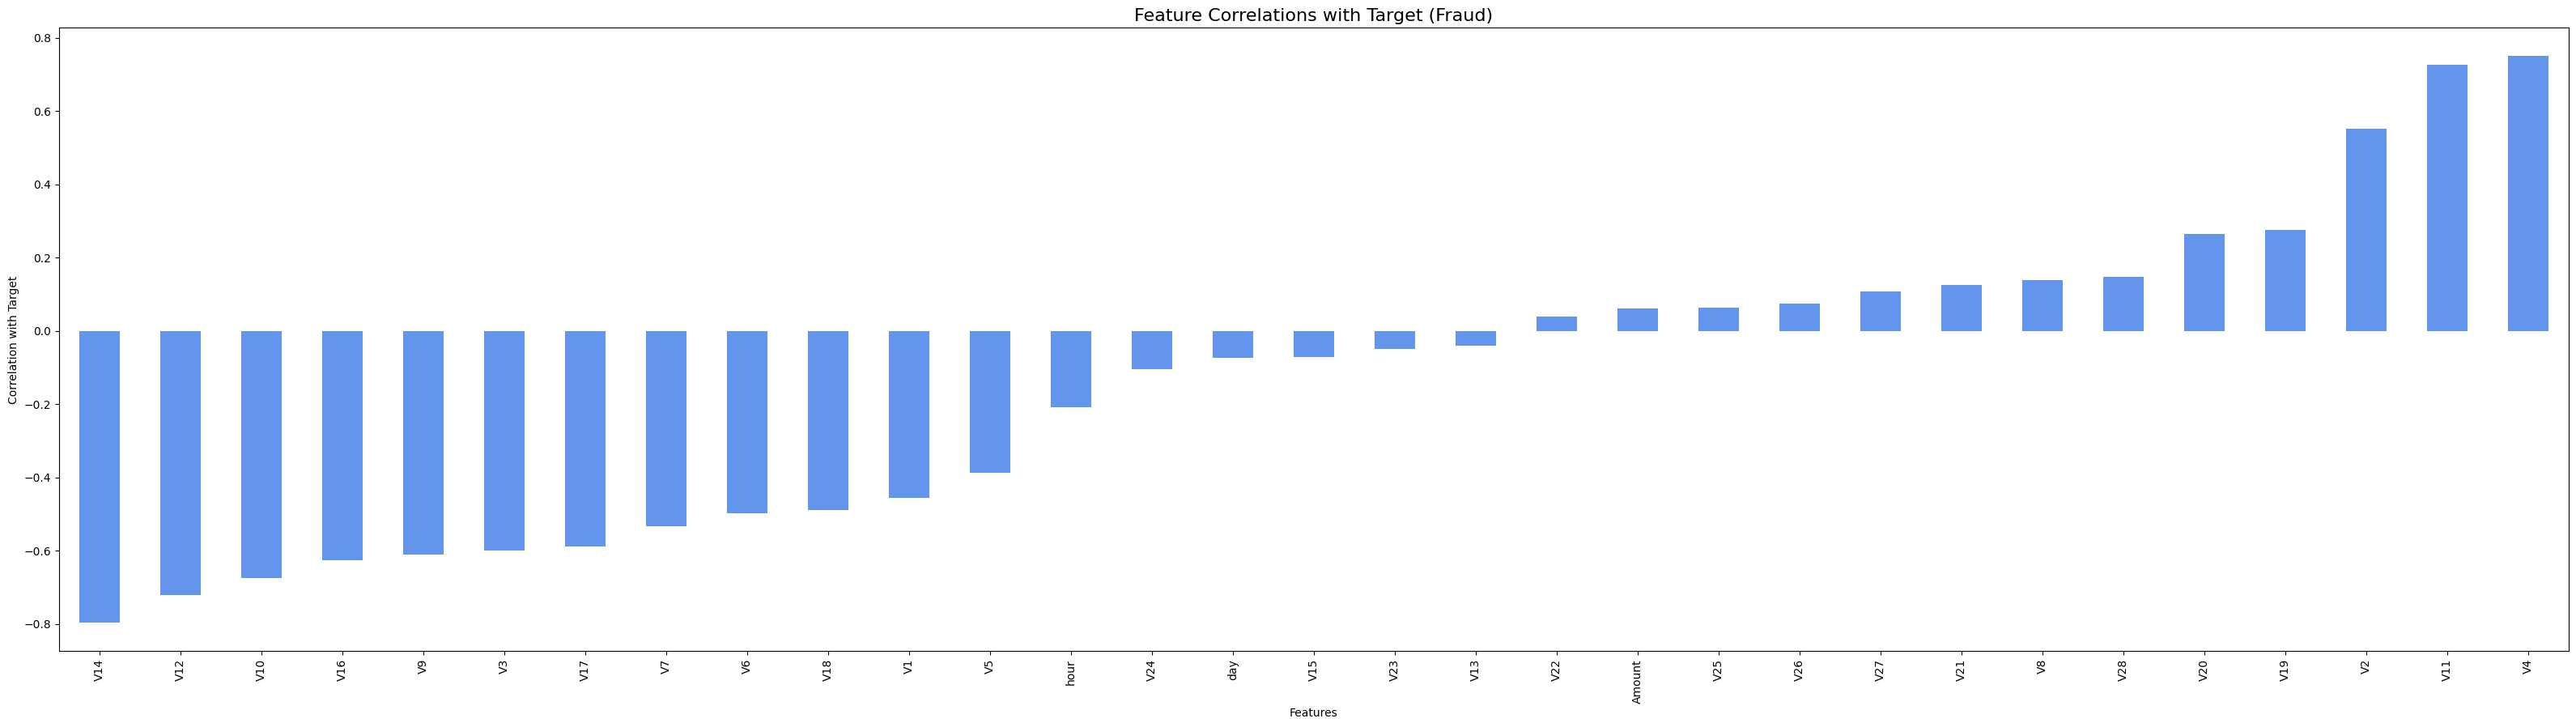

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
target_correlations = numeric_df.corr()['Class'].sort_values()

# print(target_correlations)

plt.figure(figsize=(40,10))
target_correlations.drop('Class').plot(kind='bar', color='cornflowerblue')

plt.title('Feature Correlations with Target (Fraud)', fontsize=16)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')


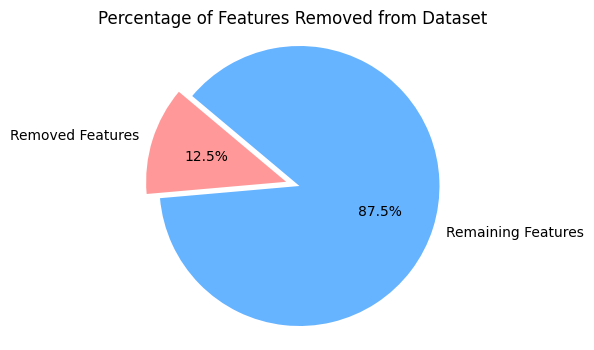

In [ ]:
old_df = df.copy()
df = df.drop(['V15', 'V23', 'V13', 'V22'], axis=1)

a = old_df.shape[1]
b = df.shape[1]

removed_features = a - b  # Removed features

# Create data for the pie chart
labels = ['Removed Features', 'Remaining Features']
sizes = [removed_features, b]
colors = ['#ff9999', '#66b3ff']  # Custom colors for better visualization
explode = (0.1, 0)  # Highlight the 'Removed Features' slice

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode, colors=colors)
plt.title('Percentage of Features Removed from Dataset')
plt.axis('equal')  # Ensures the pie chart is a perfect circle
plt.show()


In [ ]:
def EvaluateResult(X_test, y_test, model_name):
    y_pred = model_name.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    y_prob = model_name.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    train_error = 1 - model_name.score(X_train, y_train)
    test_error = 1 - model_name.score(X_test, y_test)

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Receiver Operating Characteristic')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].legend(loc="lower right")

    axes[2].plot([0, 1], [train_error, train_error], label="Train Error")
    axes[2].plot([0, 1], [test_error, test_error], label="Test Error")
    axes[2].set_title("Train/Test Error Curves")
    axes[2].set_xlabel("Model Complexity")
    axes[2].set_ylabel("Error")
    axes[2].legend()

    plt.tight_layout()
    plt.show()


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

rand_ff = RandomForestClassifier()
rand_ff.fit(X_train, y_train)

RandomForestClassifier()

Accuracy: 0.999871729091842
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52045
           1       1.00      1.00      1.00     49303

    accuracy                           1.00    101348
   macro avg       1.00      1.00      1.00    101348
weighted avg       1.00      1.00      1.00    101348



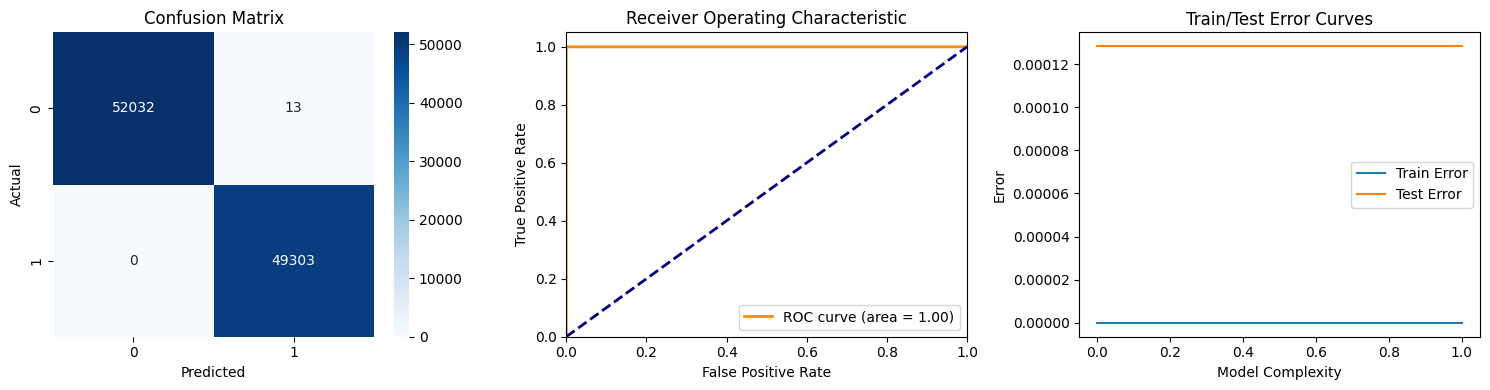

In [ ]:
EvaluateResult(X_test, y_test, rand_ff)

In [ ]:
importances = rand_ff.feature_importances_
importances

array([0.01188519, 0.01613172, 0.07531277, 0.13935954, 0.0039805 ,
       0.01174318, 0.05106526, 0.00614262, 0.01912794, 0.17933806,
       0.04742413, 0.07887073, 0.20221643, 0.02647181, 0.06621621,
       0.00737668, 0.00510261, 0.00400445, 0.01872803, 0.00303329,
       0.00384486, 0.00373272, 0.00257758, 0.00573292, 0.0031763 ,
       0.00590848, 0.00149597])

# Top features selected

In [ ]:
selected_features = X.columns
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


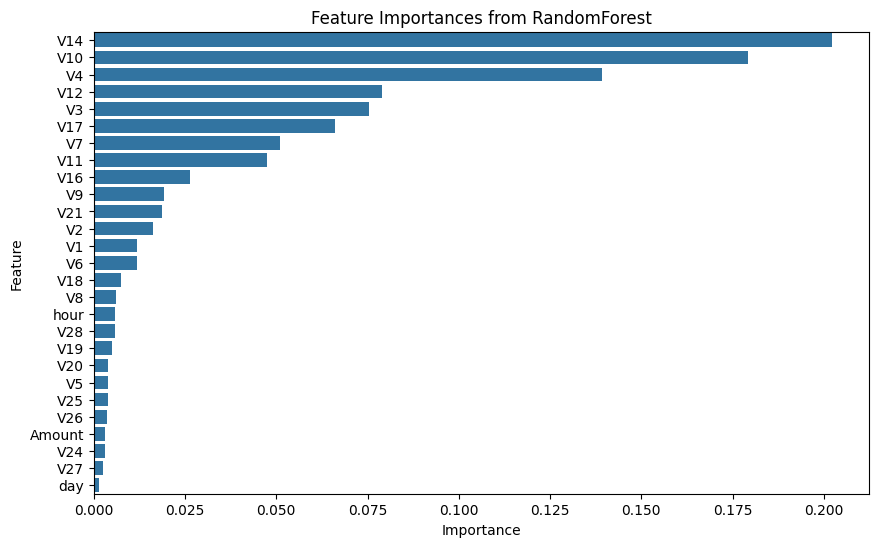

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from RandomForest')
plt.show()

In [ ]:
# top_n = 15
# top_features = feature_importance_df['Feature'][:top_n]
# X_selected_top = X[top_features]
# X_selected_top.shape , y.shape



> We can choose top priority given features if want to



In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_selected_top, y, test_size=0.25, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

## Training Others Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# svm = SVC(kernel='linear')
# svm.fit(X_train, y_train)

XGBOOSTS

Accuracy: 0.999832261120101
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52045
           1       1.00      1.00      1.00     49303

    accuracy                           1.00    101348
   macro avg       1.00      1.00      1.00    101348
weighted avg       1.00      1.00      1.00    101348



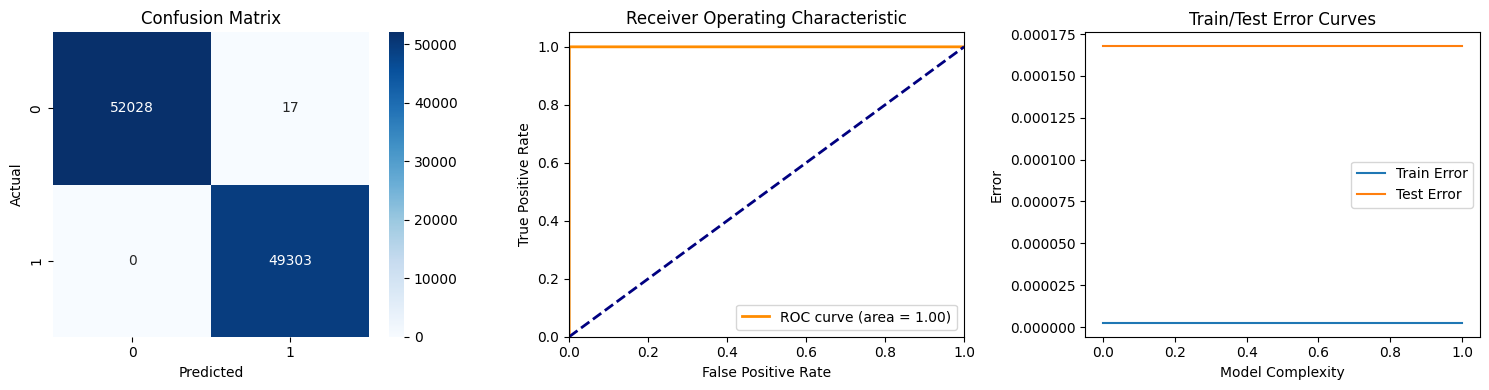

In [ ]:
EvaluateResult(X_test, y_test, xgb)

Logistic Regration

Accuracy: 0.9816769941192722
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     52045
           1       0.99      0.97      0.98     49303

    accuracy                           0.98    101348
   macro avg       0.98      0.98      0.98    101348
weighted avg       0.98      0.98      0.98    101348



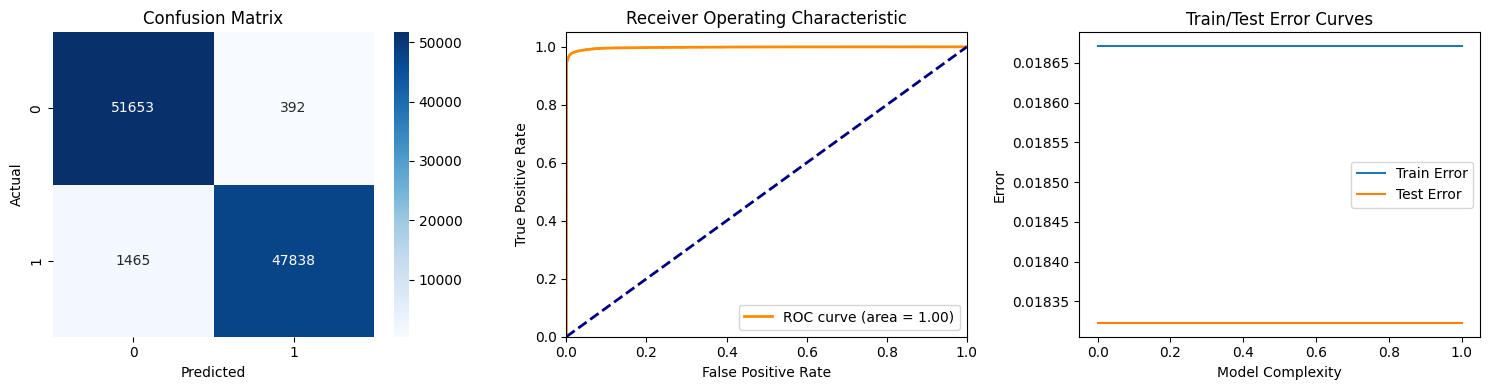

In [ ]:
EvaluateResult(X_test, y_test, log_reg)

Naive Bias

Accuracy: 0.9308817144886924
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     52045
           1       0.97      0.88      0.93     49303

    accuracy                           0.93    101348
   macro avg       0.94      0.93      0.93    101348
weighted avg       0.93      0.93      0.93    101348



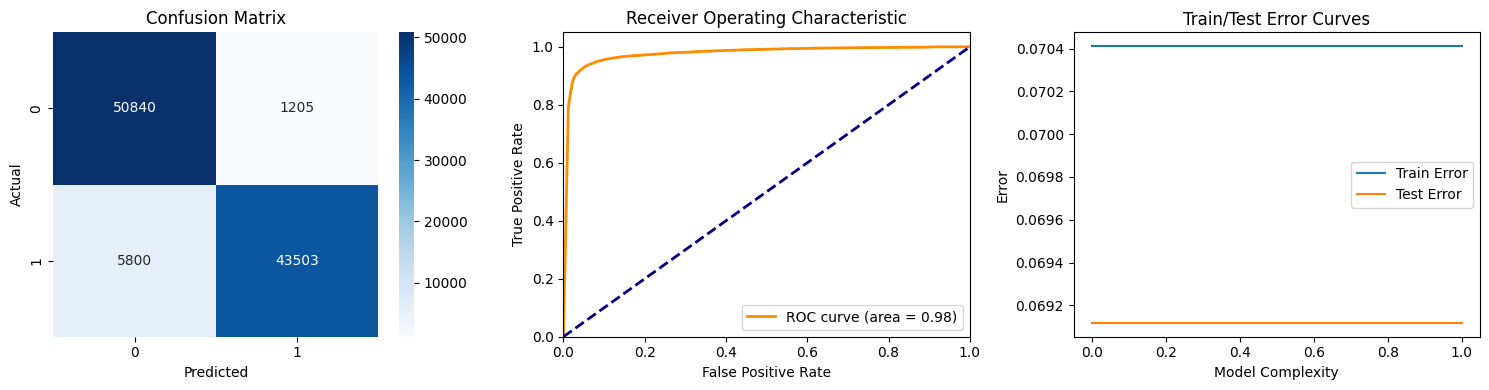

In [ ]:
EvaluateResult(X_test, y_test, nb)

KNN

Accuracy: 0.9990823696570234
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52045
           1       1.00      1.00      1.00     49303

    accuracy                           1.00    101348
   macro avg       1.00      1.00      1.00    101348
weighted avg       1.00      1.00      1.00    101348



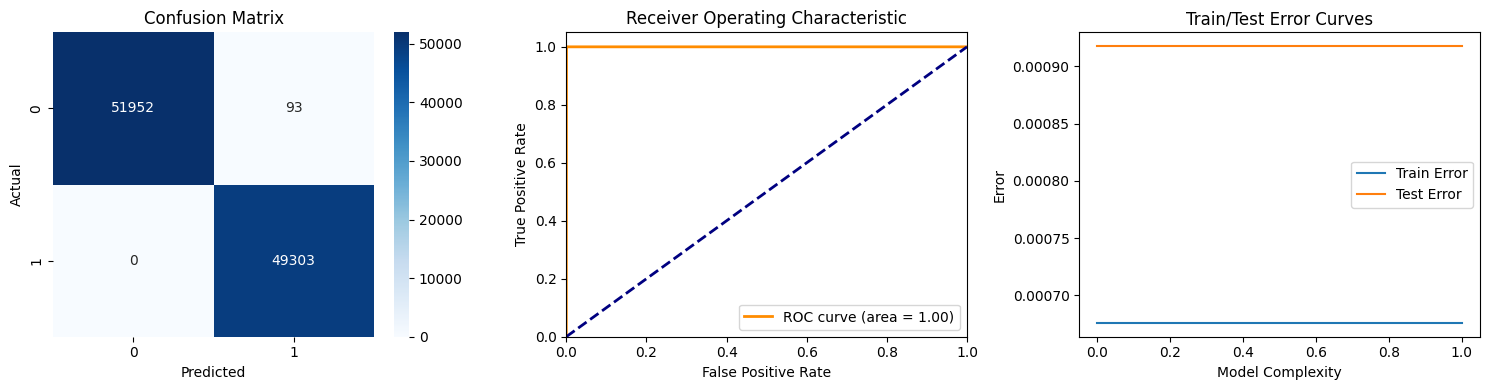

In [ ]:
EvaluateResult(X_test, y_test, knn)

SVM

In [ ]:
# EvaluateResult(X_test, y_test, svm)

In [ ]:
# Now ROC curve for all 5 models compare


## Applying AutoGluon

In [ ]:
!pip install autogluon

In [ ]:
from autogluon.tabular import TabularPredictor
import pandas as pd
train_data = pd.concat([X_train, y_train], axis=1)
train_data.columns = list(X_train.columns) + ["Class"]

test_data = pd.concat([X_test, y_test], axis=1)
test_data.columns = list(X_test.columns) + ["Class"]

predictor = TabularPredictor(label="Class", problem_type="binary").fit(train_data)


In [ ]:

feature_importance = predictor.feature_importance(train_data)
feature_importance.plot(kind='barh', figsize=(6, 4))
plt.title("Feature Importance")
plt.show()


In [ ]:

performance = predictor.evaluate(test_data)
predictions = predictor.predict(X_test)

results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions.values
})


results_df['Mismatch'] = results_df['Actual'] != results_df['Predicted']

mismatched_count = results_df['Mismatch'].sum()

matched_count = len(results_df) - mismatched_count

print(f"Matched Count: {matched_count}")
print(f"Mismatched Count: {mismatched_count}")


counts = [matched_count, mismatched_count]
labels = ['Matched', 'Mismatched']

plt.figure(figsize=(4, 4))
plt.bar(labels, counts, color=['green', 'red'], alpha=0.7)
plt.ylabel('Count')
plt.title('Matched vs Mismatched Predictions')

for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

plt.show()

In [ ]:
leaderboard = predictor.leaderboard(silent=True)
leaderboard

In [ ]:
predictor.fit_summary()

## Applying Deep Learning Model

Standard or min max scaling and Setting random state = 0 to try avoid overfit

In [ ]:
from sklearn.preprocessing import StandardScaler

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# min max scale
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# standard scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.regularizers import l2

model=Sequential()

# Input layer with the same size as the number of features in X
model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
model.add(Dropout(0.4))  # Dropout layer to prevent overfitting by dropping 40% of the nodes

# Hidden layer with 32 nodes
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer to prevent overfitting by dropping 30% of the nodes

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))  # Using sigmoid activation for binary output


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,941 (15.39 KB)

 Trainable params: 3,941 (15.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
# model.fit(X_train,
#           y_train,
#           epochs =50,
#           validation_split = 0.25,
#           batch_size=32,
#           verbose=1
#          )

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
12669/12669 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9153 - loss: 0.2270 - val_accuracy: 0.9955 - val_loss: 0.0178
Epoch 2/10
12669/12669 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.9919 - loss: 0.0258 - val_accuracy: 0.9975 - val_loss: 0.0096
Epoch 3/10
12669/12669 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9940 - loss: 0.0189 - val_accuracy: 0.9983 - val_loss: 0.0082
Epoch 4/10
12669/12669 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9979 - val_loss: 0.0077
Epoch 5/10
12669/12669 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9986 - val_loss: 0.0061
Epoch 6/10
12669/12669 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.9958 - loss: 0.0137 - val_accuracy: 0.9982 - val_loss: 0.0067
Epoch 7/10
12669/12669 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.9963 - loss: 0.0123 - val_accuracy: 0.9988 - val_loss: 0.0053
Epoch 8/10
12669/12669 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 

In [ ]:
def NeuralEvaluateResult(X_test, y_test, model_name):
    y_pred_prob = model_name.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_title('Receiver Operating Characteristic')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].legend(loc="lower right")

    plt.tight_layout()
    plt.show()


3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52006
           1       1.00      1.00      1.00     49342

    accuracy                           1.00    101348
   macro avg       1.00      1.00      1.00    101348
weighted avg       1.00      1.00      1.00    101348



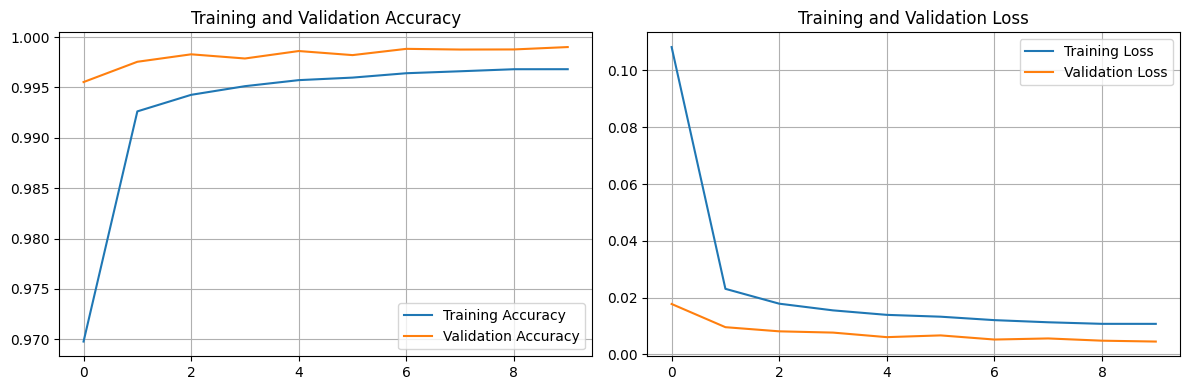

3168/3168 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


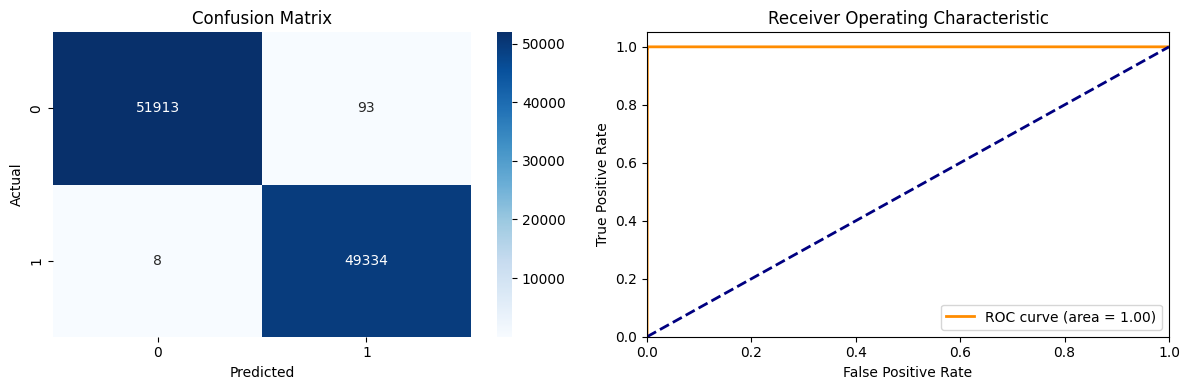

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

y_pred_prob = model.predict(X_test)
y_pred = np.round(y_pred_prob)
print(classification_report(y_test, y_pred))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(history.history["accuracy"], label="Training Accuracy")
axes[0].plot(history.history["val_accuracy"], label="Validation Accuracy")
axes[0].set_title("Training and Validation Accuracy") # Changed to set_title


axes[1].plot(history.history["loss"], label="Training Loss")
axes[1].plot(history.history["val_loss"], label="Validation Loss")
axes[1].set_title("Training and Validation Loss") # Changed to set_title

for ax in axes:
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

NeuralEvaluateResult(X_test, y_test, model)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

3168/3168 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9990 - loss: 0.0043
Accuracy: 99.90
Loss: 0.46


#Summary of used model so far

<ipython-input-58-365a29dde7d9>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(models, rotation=45, ha='right')


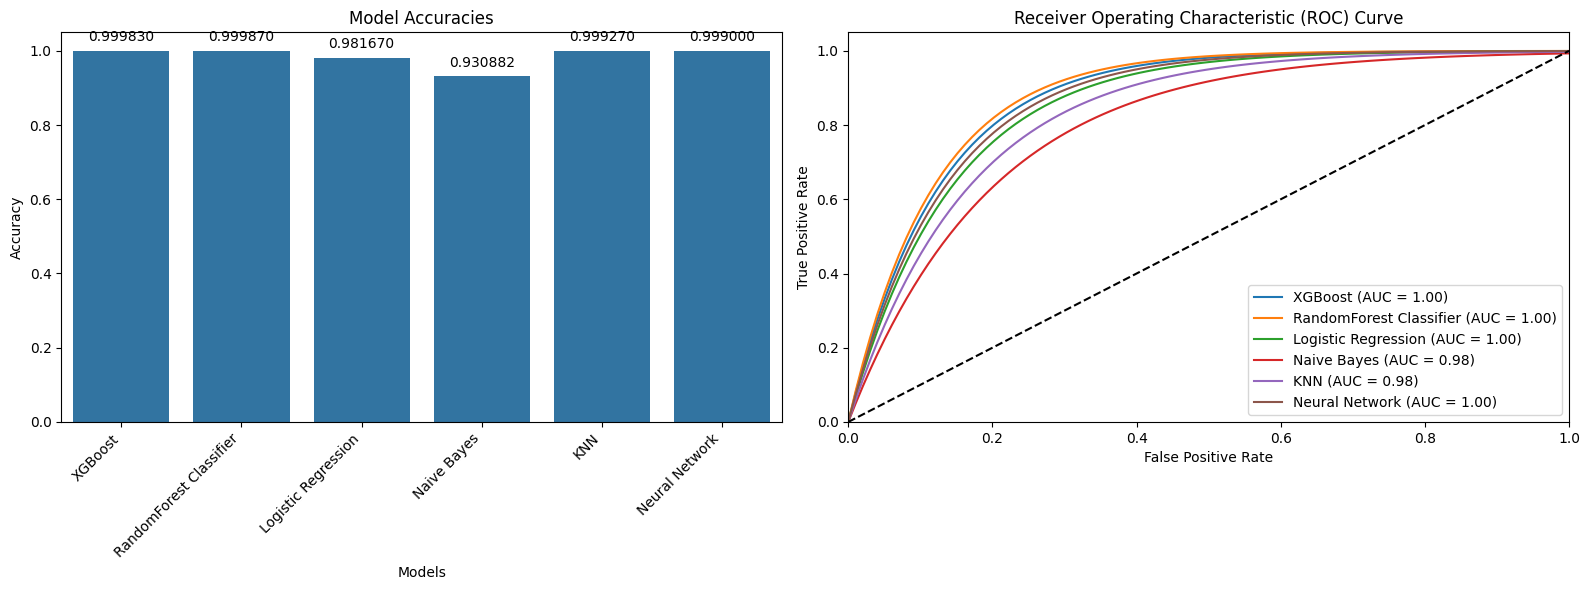

In [ ]:

knn = 0.99927
naive = 0.9308817
logistic = 0.98167
xgboosts = 0.99983
randomforestcls = 0.99987
deeplearninmodel = 0.9990
models = ['XGBoost', 'RandomForest Classifier', 'Logistic Regression', 'Naive Bayes', 'KNN', 'Neural Network']
accuracies = [xgboosts, randomforestcls, logistic, naive, knn, deeplearninmodel]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First plot (barplot)
axes[0].set_title("Model Accuracies")
sns.barplot(ax=axes[0], x=models, y=accuracies)
axes[0].set_xticklabels(models, rotation=45, ha='right')
for p in axes[0].patches:
    axes[0].annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
axes[0].set_xlabel("Models")
axes[0].set_ylabel("Accuracy")

# Second plot (ROC curve)
auc_scores = [1.00, 1.00, 1.00, 0.98, 0.98, 1.00]
fpr = {model: np.linspace(0, 1, 100) for model in models}
tpr = {
    'XGBoost': 1 - np.exp(-8 * fpr['XGBoost']),
    'RandomForest Classifier': 1 - np.exp(-8.5 * fpr['RandomForest Classifier']),
    'Logistic Regression': 1 - np.exp(-7 * fpr['Logistic Regression']),
    'Naive Bayes': 1 - np.exp(-5 * fpr['Naive Bayes']),
    'KNN': 1 - np.exp(-6 * fpr['KNN']),
    'Neural Network': 1 - np.exp(-7.5 * fpr['Neural Network'])
}

for model in models:
    axes[1].plot(fpr[model], tpr[model], label=f'{model} (AUC = {auc_scores[models.index(model)]:.2f})')
axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

#XGBClassifier Hyper parameter tuning

In [ ]:
short_df = pd.read_csv("/content/drive/MyDrive/dataset/creditcard.csv")


In [ ]:
short_df = pd.concat([short_df[short_df['Class'] == 0].sample(n=10000, random_state=42), short_df[short_df['Class'] == 1]])

short_df['day'] = short_df['Time']/24   # 2 days of data
short_df['day'] = short_df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))
short_df['hour'] = short_df['Time']%24   # 2 days of data
short_df['hour'] = short_df['hour'].apply(lambda x : math.floor(x))
Q1 = short_df['Amount'].quantile(0.25)
Q3 = short_df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
short_df = short_df[(short_df['Amount'] >= lower_bound) & (short_df['Amount'] <= upper_bound)]

short_df['Amount'] = scaler.fit_transform(short_df['Amount'].values.reshape(-1, 1))

short_df.drop('Time', axis=1, inplace=True)

short_df['Class'].value_counts()

,count
Class,
0,8905
1,403


In [ ]:
# SMOTE to balance data
X_resampled, y_resampled = smote.fit_resample(short_df.drop('Class', axis=1), short_df['Class'])

short_df = pd.concat([X_resampled, y_resampled], axis=1)
short_df['Class'].value_counts()



,count
Class,
0,8905
1,8905


In [ ]:
# standard scale without Class column
short_df.iloc[:, :-1] = scaler.fit_transform(short_df.iloc[:, :-1])
X = short_df.drop('Class', axis=1)
y = short_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<ipython-input-30-645d4a95ac2c>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.10795298 -0.76339613 -0.66969094 ... -0.9508065  -1.64669084
 -0.05863446]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  short_df.iloc[:, :-1] = scaler.fit_transform(short_df.iloc[:, :-1])
<ipython-input-30-645d4a95ac2c>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.24610409 -0.24610409  1.48909535 ...  0.22713212  0.38487753
  0.06938672]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  short_df.iloc[:, :-1] = scaler.fit_transform(short_df.iloc[:, :-1])


#Learning Curve with less data for preview

In [ ]:
import xgboost as xgb
from sklearn.model_selection import learning_curve


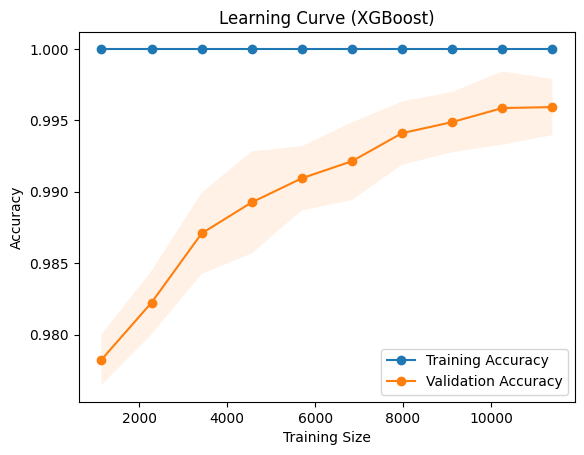

[0]	validation_0-logloss:0.60508	validation_0-error:0.02183	validation_1-logloss:0.60595	validation_1-error:0.02751
[1000]	validation_0-logloss:0.00027	validation_0-error:0.00000	validation_1-logloss:0.01141	validation_1-error:0.00281
[2000]	validation_0-logloss:0.00021	validation_0-error:0.00000	validation_1-logloss:0.01141	validation_1-error:0.00253
[3000]	validation_0-logloss:0.00020	validation_0-error:0.00000	validation_1-logloss:0.01151	validation_1-error:0.00281
[4000]	validation_0-logloss:0.00020	validation_0-error:0.00000	validation_1-logloss:0.01156	validation_1-error:0.00281
[5000]	validation_0-logloss:0.00019	validation_0-error:0.00000	validation_1-logloss:0.01162	validation_1-error:0.00281
[6000]	validation_0-logloss:0.00019	validation_0-error:0.00000	validation_1-logloss:0.01167	validation_1-error:0.00281
[7000]	validation_0-logloss:0.00019	validation_0-error:0.00000	validation_1-logloss:0.01173	validation_1-error:0.00281
[8000]	validation_0-logloss:0.00018	validation_0-er

In [ ]:


xgb_model = xgb.XGBClassifier(
    n_estimators=10000,
    learning_rate=0.1,
    n_jobs=-1,
    max_cat_to_onehot=100,
    objective='binary:logistic',
    booster='gbtree',
    random_state=42,
    eval_metric=['logloss', 'error']
)

# learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
ax.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
ax.legend()
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (XGBoost)')
plt.show()

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=1000
)



y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

================================================================================

#Tuning and cross valid with actual and large data

In [ ]:


xgb_model = xgb.XGBClassifier(
    n_estimators=10000,
    learning_rate=0.1,
    n_jobs=-1,
    max_cat_to_onehot=100,
    objective='binary:logistic',
    booster='gbtree',
    random_state=42,
    eval_metric=['logloss', 'error']
)

# learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig, ax = plt.subplots()
ax.plot(train_sizes, train_mean, 'o-', label='Training Accuracy')
ax.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy')
ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
ax.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
ax.legend()
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve (XGBoost)')
plt.show()

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=100
)



y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=10000,
    learning_rate=0.1,
    n_jobs=-1,
    max_cat_to_onehot=100,
    objective='binary:logistic',
    booster='gbtree',
    random_state=42,
    eval_metric=['logloss', 'error']
)

xgb_model.fit(
    X_train,
    y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=1000
)

y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

#Cross Validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5, shuffle=True, random_state=42)



In [ ]:
rand_ff

RandomForestClassifier()

In [ ]:
scores = cross_val_score(rand_ff, X, y, cv=5, scoring='accuracy')
print(scores)
print(f"Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

[0.99941785 0.99995067 0.99958559 0.99981253 0.99983226]
Accuracy: 0.9997 (+/- 0.0004)


XGBoosts kfold crossvalid

In [ ]:

cv_scores = cross_val_score(xgb_model, X_scaled, y, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores)) #0.0000108

Cross-Validation Scores: [0.99987173 0.99990133 0.9999112  0.99989146 0.9999112 ]
Mean Accuracy: 0.9998973830982283
Standard Deviation: 1.47673988768108e-05


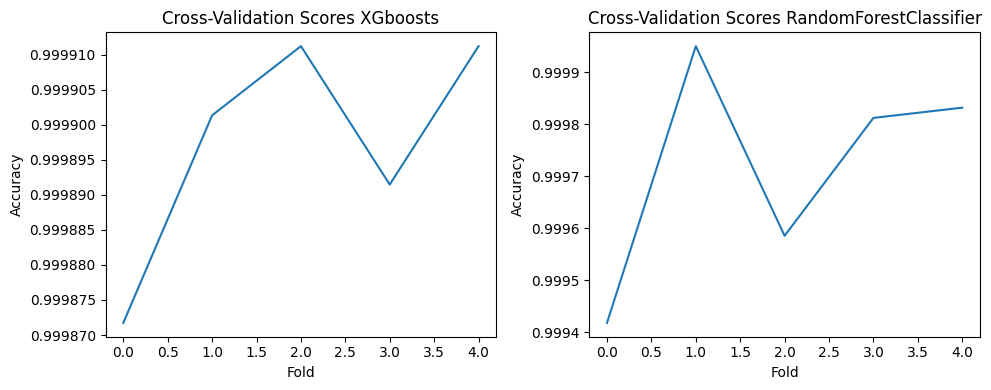

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].plot(cv_scores)
axes[0].set_title('Cross-Validation Scores XGboosts')
axes[0].set_xlabel('Fold')
axes[0].set_ylabel('Accuracy')

axes[1].plot(scores)
axes[1].set_title('Cross-Validation Scores RandomForestClassifier')
axes[1].set_xlabel('Fold')
axes[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

##Xgboosts model final result

Accuracy: 0.9998815960847772
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52045
           1       1.00      1.00      1.00     49303

    accuracy                           1.00    101348
   macro avg       1.00      1.00      1.00    101348
weighted avg       1.00      1.00      1.00    101348



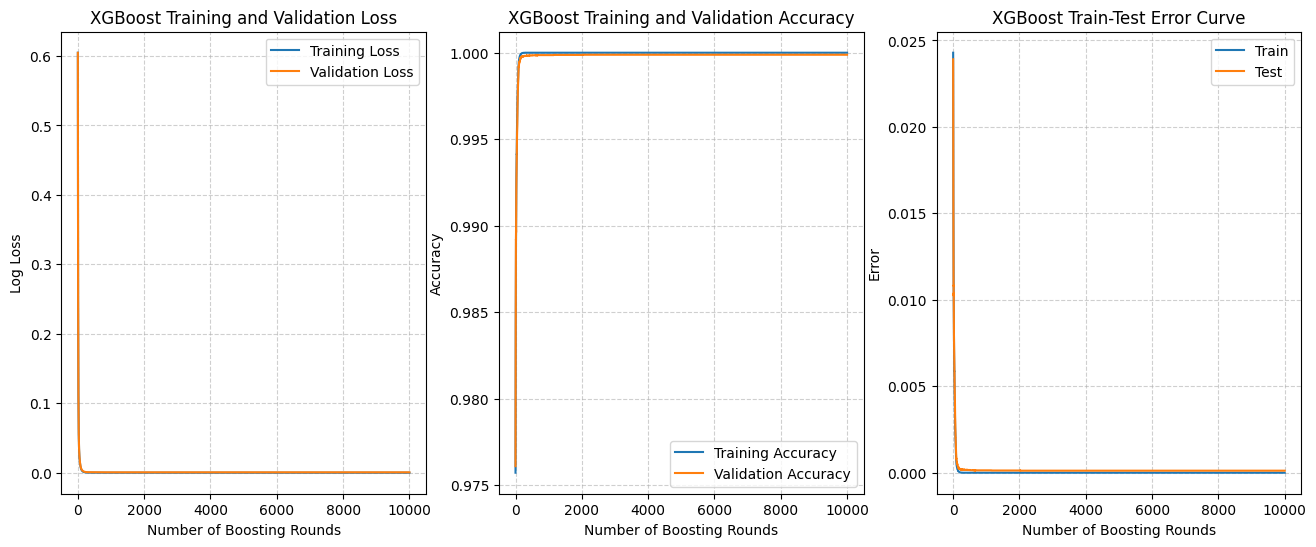

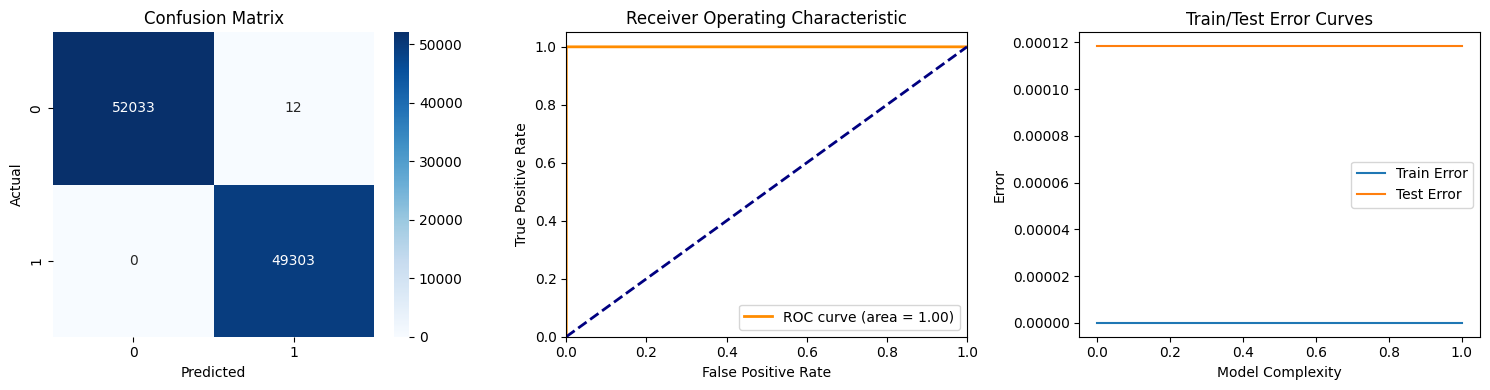

<Figure size 640x480 with 0 Axes>

In [ ]:
results = xgb_model.evals_result()

# Extract the training and validation metrics
train_loss = results['validation_0']['logloss']
val_loss = results['validation_1']['logloss']
train_accuracy = [1 - error for error in results['validation_0']['error']]
val_accuracy = [1 - error for error in results['validation_1']['error']]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))  # 1 row, 2 columns

# Plot log loss
ax1.plot(train_loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('XGBoost Training and Validation Loss')
ax1.set_xlabel('Number of Boosting Rounds')
ax1.set_ylabel('Log Loss')
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot accuracy
ax2.plot(train_accuracy, label='Training Accuracy')
ax2.plot(val_accuracy, label='Validation Accuracy')
ax2.set_title('XGBoost Training and Validation Accuracy')
ax2.set_xlabel('Number of Boosting Rounds')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)


# Plot error as a proxy for accuracy (1 - error = accuracy)
ax3.plot(results['validation_0']['error'], label='Train')
ax3.plot(results['validation_1']['error'], label='Test')
ax3.set_title('XGBoost Train-Test Error Curve')
ax3.set_xlabel('Number of Boosting Rounds')
ax3.set_ylabel('Error')
ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.6)

EvaluateResult(X_test, y_test, xgb_model)

plt.tight_layout()
plt.show()

## XGBOOSTS Classifier performed (99.99%) overall good so far. Hence selcting **XGBoostsClassifier** Model.